In [5]:
# def plot_array(plt, shape=(1, 10), figsize=None, cmap='viridis', a=None):
#     colors = ('black', 'white')
#     if a is None:
#         array = np.linspace(0, 10, shape[0] * shape[1]).reshape(shape)
#     else:
#         array = a
#     if figsize is None:
#         figsize = shape
#     plt.figure(figsize=figsize)
# #     cmap = colors.ListedColormap(['blue'])
#     plt.imshow(array, cmap=cmap)
# #     if len(shape) == 2:
# #         if shape[0] == 1:
# #             gen = (i for i in range(shape[1]))
# #         else:
# #             gen = ("{}".format(i * shape[1] + j)
# #                    for i in range(shape[0]) 
# #                    for j in range(shape[1]))
# #         for i, j in ((i, j) for i in range(shape[0]) for j in range(shape[1])):
# #             plt.text(j, i, gen.send(None), ha='center', va='center', 
# #                      size=15 if shape[0] != 1 else 20, 
# #                      color=colors[1 if array[i, j] < 5 else 0])
# #     else:
# #         raise ValueError('Only support for 1/2-d array')
#     plt.axis('off')
#     #plt.title("{}-d array with shape {}".format(1 if array.shape[0] ==1 else 2,
#     #                                                          array.shape))


def download_img(filename):
    import re
    import os
    import requests
    url_pattern = re.compile(r'''(?x)
                            .*src=\\"(.*?)\\" .* #src=\"url\"
                            | .*(https:.*(?:png|jpeg)).*       #https: 
                            | .*(http:.*(?:png|jpeg)).*''')    #http:
    img_name_pattern = re.compile(r'''(?x)
                            .*/(.*.png).*
                            |.*/(.*.jpeg).*''')
    with open(filename, 'r', encoding='utf-8') as f:
        for i in  re.finditer(url_pattern, ''.join(f.readlines())):
            url = [url for url in i.groups() if url][0]
            if len(url) < 25:
                continue
            image_name = [ name for name in re.match(img_name_pattern, url).groups()  if name][0]
            if not os.path.isfile(image_name, ):
                try:
                    response = requests.request("get", url)
                    with open(image_name, 'wb') as img:
                        img.write(response.content)
                except:
                    print(url, image_name)

def plot_linspace(a1,  a2, num, figsize=(5, 2)):
    plt.figure(figsize=figsize)
    plt.plot(a2, np.zeros(num) - 0.1, 'o')
    plt.plot(a1, np.zeros(num) + 0.1, 'o')
    plt.ylim([-0.2, +0.2])
    plt.yticks([])
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 一. 用 Numpy 做矩阵运算

`Numpy`是一个支持多维数组、矩阵快速运算的科学计算包，其自带众多针对数组运算的数学函数，极大的简化了向量和矩阵的操作。正因为如此，众多软件包使用Numpy作为其基础构架，比如`scipy`, `pandas`, `scikit-learn`，`matplotlib`等科学计算、数据科学和绘图库。`numpy`以及这些依赖`numpy`的软件包，形成了一个强大的科学计算环境。

## 1. numpy.ndarray 对象
`ndarray`是`numpy`的基本对象，用于存储一个元素`数据类型相同`，元素`数量固定`的多维数组。 我们先来看看`ndarray`大致形状以及其表现形式：

**一维数组**：用于表示一个一维的序列。时间序列就是一维的，该序列中的每个元素对应不同时刻下的值(信号强度，音频信号，股票价格等)。并且一维数组和`list`非常相似，都可以对他们进行索引，切片和迭代。

<img src="../docs/img/0640.jpeg" width=600 height=400></img>


**二维数组**：类似于我们数学中的**矩阵**，拥有两个维度。一张黑白图像就是二维的`(高度x宽度)`，图片中的每个像素可以用单个数字来表示(0为黑色, 255为白色)。

<center>
<img src="../docs/img/1640.jpeg" width=600 height=300></img>
</center>

再比如日常生活中使用的电子表格，也拥有行与列两个维度，所以可以使用二维的`ndarray`进行表示。(`pandas`就是干这个的, 并且`pandas`也是在`numpy`的`ndarray`基础上构建的)

<center>
<img src="../docs/img/2640.jpeg" width=600 height=300></img>
</center>

**多维数组**：拥有多个维度。上图为**黑白图像**，其**灰度**只需要用一个数字(0-255)就可以进行表示，所以可以用一个**二维数组**来表示；我们知道一张彩色图片的每个像素点的颜色可以用**RGB**来表示-**红、绿、蓝**。因此，我们的数据是三维的`(高度x宽度x3)`，需要用一个**三维数组**来表示。更一般的，还可以拓展到更多维的情况。

<center>
<img src="../docs/img/3640.jpeg" width=600 height=300></img>
</center>

### 1.1 `ndarray` 对象的基本属性:
有了上面的抽象表示，我们来看看`ndarray`这个类的对象具有哪些基本属性，通过一个对象的基本属性，可以大致的了解一个对象具有哪些性质。

我们以一个3 * 4的矩阵来说明：

In [120]:
array = np.array([[0, 1, 2, 3],
                 [4, 5, 6, 7],
                 [8, 9, 10, 11]], dtype=np.int32)
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

</center>
<img src="../docs/img/4ndarray_dipiction.png" width=800 height=600></img>
</center>

> 注: 由于是`Little-endian`, 实际上该数字在内存中的字节顺序是反序。

- `ndarray.ndim` 表示多维数组的维度数目或轴数，对于矩阵而言，其有两个轴，可以理解为成坐标轴的形式，第一个轴表示不同行，第二个轴表示不同列

In [51]:
array.ndim

2

- `ndarray.shape` 表示多维数组的大小，是一个**整数元组**，期内各个值分别表示不同轴的长度。对array这个二维数组而言，类似于一个2行3列的矩阵。

In [86]:
array.shape

(2, 4)

- `ndarray.size` 多维数组的元素总数，等于shape中各个值得乘积。

In [90]:
array.size              # 2行3列的矩阵自然有8个元素

8

- `ndarray.dtype` 用于描述数组中`元素类型`的对象。可以在`np.array()`构造函数或其他创建`ndarray`的函数中指定元素的类型。

>注：`np.ndarray` 与 `list` 的一个主要的区别就是: `ndarray`是`固定`元素类型、元素数量的，而`list`可以动态的增减元素。

In [156]:
array.dtype                        

dtype('float64')

- `ndarray.itemsize` 表示数组中每个元素所占用的字节数

In [99]:
array.itemsize                    # 元素类型为float32， 所以占用 4 bytes = 32 bits / 8 bits

4

上面我们看到了ndarray的抽象表现形式以及基本的属性，现在我们来看看如何创建一个`ndarray`, 下面将介绍一些比较常用的方法。

### 1.2 从现成的数据生成`ndarray`

- `np.array()` 上面已经用到过这个函数了，可以根据存在python内置的数据类型比如list中的数据，创建一个`ndarray`。其中的`dtype`参数可以使用如`float` `int` `double`等标准python类型，也可以使用numpy提供的`np.int32` `np.int16` `np.float64`等对象。

>注：数据对象必须作为第一个参数传入, **多维数组**需要使用**嵌套的数组**(或tuple, range)

<center>
<img src="../docs/img/5640.png" width=400 height=200></img>
</center>
<center>
<img src="../docs/img/6640.png" width=400 height=200></img>
</center>

In [177]:
array = np.array([[1, 2, 3, 4],
                 [4, 5, 6, 7]], dtype=np.float64)    # 如果没有特别的要求，numpy会自动选择合适的dtype
array.dtype
array

dtype('float64')

array([[1., 2., 3., 4.],
       [4., 5., 6., 7.]])

- `np.copy()`或 `ndarray.copy()` 返回一个已有的`ndarray`的拷贝

In [176]:
array.copy()

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

### 1.3 生成指定大小和元素类型的`ndarray`。

前面说过，由于`ndarray`不能动态的删减元素(删减元素需要重新生成相应大小的`ndarray`, 并拷贝相应的数据，相比于`list`而言，非常低效)，所以使用`numpy`的时候经常需要使用这些函数创建指定容量的数组(预先分配相应大小的空间，供计算结果使用)。

#### 1.3.1 `np.zeros()`/`np.ones()`/`np.empty()` 用于创建拥有指定大小(`shape`)和元素类型(`dtype`)的多维数组，并且使用`0/1`填充整个数组，即初始化整个数组。

<center>
<img src="../docs/img/7640.jpeg" width=590 height=200></img>
</center>
<center>
<img src="../docs/img/8640.jpeg" width=600 height=200></img>
</center>
<center>
<img src="../docs/img/9640.jpeg" width=700 height=200></img>
</center>

`np.empty()` 函数生成的数组元素没有初始值，元素的值是随机的，取决于内存的实际状态。

In [18]:
np.empty((2, 2, 3))

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

还可以指定`dtype`

In [15]:
np.zeros((3, 4), dtype=np.float)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### 1.3.2 `np.zeros_like()`/`np.ones_like()`/`np.empty_like()` 在很多计算中，输入数据(数组)和输出数据(数组)的大小是一样的，可以使用这些函数生成与输入数据大小相同，元素类型相同的数组。

In [150]:
new_array1 = np.zeros_like(array)
new_array2 = np.ones_like(array, dtype=np.float64)            # 还可以指定想要的dtype
new_array1.dtype
new_array1
new_array2.dtype
new_array2

dtype('int32')

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

dtype('float64')

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### 1.3.3 `np.full`/`np.full_like` 更一般的情况，还可以指定用于填充数组的初始值。

In [173]:
np.full((3, 3), fill_value=3, dtype=np.int)
np.full_like(array, fill_value=4, dtype=np.float)

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

#### 1.3.4 `np.arange()`/`np.linspace()`/`np.logspace()` 用于创建等差或等比数列(`ndarray`)。

##### 1.3.4.1 `np.arange()` 用于创建等差数列，用法和功能和python的`built-in`函数`range`相似，只不过这个函数返回的是`ndarray`。

> 再次提醒: `[start, stop)`为一个左闭右开的区间(`不包括stop`)，返回的数列为间距为`step`的等差数列。

In [182]:
np.arange(10)         # 等价于 np.arange(start=0, stop=10, step=1)
np.arange(5, 10, 2)   # 等价于 np.arange(start=5, stop=10, step=2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([5, 7, 9])

##### 1.3.4.2 `np.linspace(start, stop, num=50, endpoint=True, retstep=False)` 也是用于创建等差数列，不过用法要稍微复杂点。其中`restep`设为`True`则返回的结果是一个元组，第一个元素还是等差数列(`ndarray`), 第二个元素则是等差数列的`step`。我们来看下面的例子：

(array([ 2.        ,  4.66666667,  7.33333333, 10.        ]),
 2.6666666666666665)

(array([2., 4., 6., 8.]), 2.0)

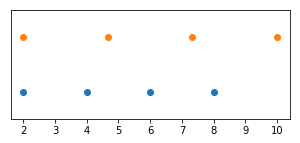

In [205]:
x1, step1 = np.linspace(2, 10, 4, endpoint=True, retstep=True)
x2, step2 = np.linspace(2, 10, 4, endpoint=False, retstep=True)
plot_linspace(x1, x2, 4)
x1, step1
x2, step2

可以看到，等差数列第一个元素都是`start`(那是肯定的)，关键就在于返回的等差数列的间距`step`不同。
1. 如果`endpoint`设为`True`, 表示返回的等差数列的最后一个元素是`stop`。等差数列**首元素**和**末元素**都已经确定，而等差数列总数为`4`，中间还需要插入`2`个点, 则`step`为：$$\left(10 - 2\right) / \left(2 + 1\right) = 2.666$$
2. 如果`endpoint`设为`False`, 则只有**首元素**是确定的，而等差数列总数为`4`，中间还需要插入`3`个点，则`step`为： $$\left(10 - 2\right) / \left(3 + 1\right) = 2$$
3. 知道了`step`、首元素`start`和**元素数量**，自然就可以计算求出整个等差数列了。

##### 1.3.4.3 `np.logspace()` 函数生成的是**等比数列**, 使用方法和`np.linspace`一样。唯一的不同是该函数需要指定一个**指数**(默认为10)。

array([ 4.        , 10.0793684 , 25.39841683, 64.        ])

array([ 4.,  8., 16., 32.])

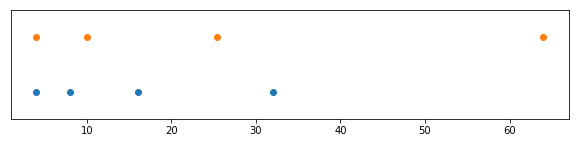

In [219]:
x1 = np.logspace(2, 6, 4, endpoint=True, base=2)
x2 = np.logspace(2, 6, 4, endpoint=False, base=2)
plot_linspace(x1, x2, 4, figsize=(10, 2))
x1
x2

如果说`np.linspace()`返回的是`[start, stop)`之间的**等差数列**，那么`np.logspace()`返回的就是`[base**start, base**stop)`之间的**等比数列**。比值就是上面的例子中计算出来的`step`。下面的例子展示了他们之间的关联:

array([2.        , 3.33333333, 4.66666667, 6.        ])

array([2., 3., 4., 5.])

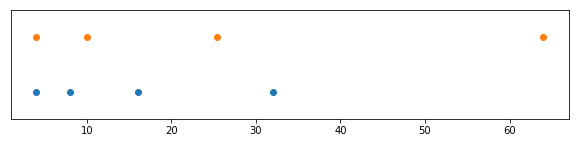

In [223]:
x1 = np.linspace(2, 6, 4, endpoint=True)          # 注意使用的是 linspace
x2 = np.linspace(2, 6, 4, endpoint=False)         # 注意使用的是 linspace
plot_linspace(np.power(2, x1), np.power(2, x2), 4, figsize=(10, 2))     # np.power(base, exponents) 为幂函数
x1
x2

可以看到，两种方式是等价的。

## 2 索引

`ndarray`支持python中`x[obj]`的索引语法。根据`obj`类型的不同，可以分为三大类。**基本索引**、**高级索引**和**字段访问**。这一节介绍`基本索引`这种与python内置序列索引方式相似的索引模式。

### 基本索引
在这种索引模式下，`obj`可以是**整数(integer)**，**slice对象(start: stop : step)**, 或是一个**元组**, 这元组中包含`integer`或是`slice`对象。

> 注意:`x[(exp1, exp2, ...expN)]` 是与 `x[exp1, exp2, ...exp3]` 是等价的。所以后续都采用`x[exp1, exp2, ...exp3]`这种方式进行说明。

一维数组的索引方式和`list`等内置类型几乎没有区别。

<center>
<img src="../docs/img/10640.png" width=590 height=200></img>
</center>

In [291]:
array = np.arange(0, 15, 2)
array
array[2]                                 # 索引
array[2:7:2]                             # 切片，step为 2
array[3:6] = -4                          # 切片，并赋值
array[::-2]                              # 反序切片, step为-2
for i in array[::-1]:                    # 切片, 并迭代
    print(i)

array([ 0,  2,  4,  6,  8, 10, 12, 14])

4

array([ 4,  8, 12])

array([14, -4, -4,  2])

14
12
-4
-4
-4
4
2
0


这些操作可以被泛化到**多(N)维数组**中，即将操作细分到**每一个维度(轴)**上进行。对多维数组不同轴的**整数索引/切片**需要用`','`进行分隔`x[obj1, obj2,..,objN]`，`obj`可以是`integer`或者`slice`。

<center>
<img src="../docs/img/11640.png" width=590 height=200></img>
</center>

In [382]:
a = np.array([[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]])
a
a[:, 1]           # 第一个轴完整切片，表示取所有行，第二个轴使用索引1，表示取第二列，返回的是长度为5的一维数组
a[0:5, 1]         # 与上面等价
a[0: 2, 1:3]      

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([ 1,  5,  9, 13])

array([ 1,  5,  9, 13])

array([[1, 2],
       [5, 6]])

可以理解为先通过**行切片**取出**前两行**，后再通过**列切片**取出前两行中间的**两列**

<center>
<img src="../docs/img/array_slice.png" width=600 height=300></img>
</center>

对多维数组进行**整数索引/切片**的时候需要注意两种方式的**区别**：对某个轴进行**整数索引**后返回的数组**轴数减少1**，使用**切片**则能保持**轴数不变**。如：

In [288]:
a = np.random.randn(5, 5)
a[1,:].shape, a[1, :]       # 虽然两语句都是为了取出第2行，但是使用索引会使得二维数组变为一维数组
a[1:2, :].shape, a[1:2, :]

((5,),
 array([ 1.33472536,  0.75149882, -2.23568792,  0.68340291, -1.95378406]))

((1, 5),
 array([[ 1.33472536,  0.75149882, -2.23568792,  0.68340291, -1.95378406]]))

可以省略**后面多个轴**的索引/切片，缺失的索引/切片将会被视为**完整的切片**，即`:`

In [283]:
a[1:2]             # 可以省略后面轴的索引/切片， 取出下标为1的那行
a[1:2, :]          # 这两种方式时等价的
b = np.random.randn(2,2,2)# 注意和一般生成数组的方式不同，这里以多个位置参数的方式指定轴数和各轴的长度
b
b[1:2, 1]          # 省略最后一个轴的索引/切片
b[1:2]             # 省略最后两个轴的索引/切片

array([[-1.33833989,  0.24542238,  0.13641075,  0.32937989, -1.48232152]])

array([[-1.33833989,  0.24542238,  0.13641075,  0.32937989, -1.48232152]])

array([[[ 0.47188134, -0.00618902],
        [ 1.11793864, -0.55524621]],

       [[-0.5535917 ,  0.95428727],
        [ 1.02390199,  0.54854368]]])

array([[1.02390199, 0.54854368]])

array([[[-0.5535917 ,  0.95428727],
        [ 1.02390199,  0.54854368]]])

还可以用`...`来表示尽可能多的轴的完整切片。比如一个五维的数组`a`：
- `a[1, 2,...]` 等价于 `a[1, 2, :, :, :]`
- `a[..., 3]` 等价于 `a[:, :, :, :, 3]`
- `a[1, ...,3, :]` 等价于 `a[1, :, :, 3, :]`

使用**基本索引**取得的数组并不拥有真正的数据，只是**引用**了被索引数组中的数据， 并没有**拷贝**数据并生成**新的数组**。所以，对**基本索引得到的数组**的任何操作实际上都是在原始数组中的数据上进行，以**赋值**为例:

> 注：`nunpy` 的很多操作都是返回这种数组(并不拥有于数据，只是引用其他对象的数据)，这种数组也称为`view`,后续会介绍。

In [333]:
a = np.arange(25).reshape(5, 5)
a
indexed = a[1:4, 1:4]
indexed[:] = 0
indexed
a
a[1:4, 1:4] =0          # 简化操作，不保存中间变量
a = 0                   # 注意这是把0值赋给了a变量，相当于修改了a变量引用的对象。
a                       # 修改一个对象的内部属性，只能通过调用该对象提供的方法，这里索引操作类似于调用对象的一个方法。

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

array([[ 0,  1,  2,  3,  4],
       [ 5,  0,  0,  0,  9],
       [10,  0,  0,  0, 14],
       [15,  0,  0,  0, 19],
       [20, 21, 22, 23, 24]])

0

可以看到通过修改`indexed`数组的值，修改了原始数组的值。

### 迭代

对多维数组的**迭代**是针对**第一个维度(轴)**进行的，使用`flat`属性可以对所有元素进行迭代。

In [265]:
a = np.array([[1, 2, 3, 4],
            [4, 5, 6, 7]])
for row in a:
    row
for i in a.flat:
    i

array([1, 2, 3, 4])

array([4, 5, 6, 7])

1

2

3

4

4

5

6

7

> 注意: 对`ndarray`进行迭代，效率很低，一般只会对长度较短的**轴**进行迭代。

## 3 数组转换

### 3.1 改变数组的形状

很多时候，某些**矩阵运算**、**机器学习模型**的输入数据都需要具有特定大小`shape`的数组，这时候就需要更改我们数据的维度，以满足计算的要求。比如:
- 将一个数组进行**转置**以便和其他矩阵进行**点乘操作**(矩阵的乘法)。
- 将一个**一维数组**转成形状为`(n_samples, n_features)`的**二维矩阵**。

`ndarray.reshape()` 函数接受一个表示`shape`的**元组或int**(变成一维)参数，返回一个具有新`shape`的数组。`reshape()`函数**不会改变**原数组对象，如果可能的话返回一个`view`, 否则也是返回新数组的`copy`

<center>
<img src="../docs/img/13640.png" width=600 height=300></img>
</center>

In [141]:
a = np.arange(1, 7)
a
a.reshape(2, 3)
a.reshape(3, 2)

array([1, 2, 3, 4, 5, 6])

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 2],
       [3, 4],
       [5, 6]])

使用`-1`让`numpy`自动判断剩余的维数大小。

In [154]:
a = np.ones((4, 3))
a
a.reshape(3, -1)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

`ndarray.resize()`函数同样可以修改数组的`shape`, 但是该函数是直接对**原数组**进行更改, 并且返回的是`None`。

In [155]:
a = np.arange(1, 7).reshape(2, 3)
a
print(a.resize(6))
a

array([[1, 2, 3],
       [4, 5, 6]])

None


array([1, 2, 3, 4, 5, 6])

`ndarray.T` 返回一个数组的**转置**(Transposition)：

<center>
<img src="../docs/img/14640.png" width=400 height=200></img>
</center>

In [162]:
a = np.random.randn(3, 4)
a
a.T

array([[-0.4032459 ,  1.39147415, -1.10504978,  1.67281219],
       [-1.22481963,  1.4218714 ,  0.09118642, -2.05972854],
       [-1.44306641,  0.12490351, -1.34762805,  0.81115307]])

array([[-0.4032459 , -1.22481963, -1.44306641],
       [ 1.39147415,  1.4218714 ,  0.12490351],
       [-1.10504978,  0.09118642, -1.34762805],
       [ 1.67281219, -2.05972854,  0.81115307]])

`ndarray.ravel()` 返回一个包含原数组所有元素的**一维数组**。

In [165]:
a.ravel()
a.ravel().shape

array([-0.4032459 ,  1.39147415, -1.10504978,  1.67281219, -1.22481963,
        1.4218714 ,  0.09118642, -2.05972854, -1.44306641,  0.12490351,
       -1.34762805,  0.81115307])

(12,)

### 3.2 **拼接、拆分**数组

除了需要改变数组的形状，有时我们还需要将多个数据(数组)**拼接**起来或**拆分**开，比如下面几种情形：
- 在使用机器学习模型的时候，如果有多批训练数据: `n * (n_samples, n_features)`，为了将所有数据一次性的送给模型，就需要将这些数据一个一个堆叠起来，变成`(n * n_sample, n_features)`一个完整的`ndarray`。
- 而有些模型的训练过程，需要**分批次**的输送数据，这时候就需要将我们的训练样本拆分成多个长度相同的**子数组**。
- `numpy`的矩阵运算速度非常快，所以将多个数据合并成一个`ndarray`后再进行计算，能够使得计算速度最大化。


`np.concatenate()` 接收一个`ndarray`的元组和一个`axis`参数, 将多个`ndarray`沿方向`axis`(轴)拼接起来。

<center>
<img src="../docs/img/15numpy-hstack-visual-example_v2.png" width=400 height=200></img>
</center>

In [179]:
a = np.zeros((2,2))
b = np.ones((2, 2))
a
b
np.concatenate((a, b), axis=0)            # 沿垂直方向拼接
np.concatenate((a, b), axis=1)            # 沿水平方向拼接

array([[0., 0.],
       [0., 0.]])

array([[1., 1.],
       [1., 1.]])

array([[0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])

array([[0., 0., 1., 1.],
       [0., 0., 1., 1.]])

`np.hstack()` 与`np.vstack()` 功能与`np.concanate()`功能类似，只不过不需要指定`axis`了: 
- `vstack()`等价于`axis=0`，即在垂直(vertical/第一个轴)方向上拼接。
- `hstack()`等价于`axis=1`, 即在水平(horizontal/第二个轴)方向上拼接。

In [177]:
a = np.zeros((2,2))
b = np.ones((2, 2))
a
b
np.vstack((a, b))
np.hstack((a, b))

array([[0., 0.],
       [0., 0.]])

array([[1., 1.],
       [1., 1.]])

array([[0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.]])

array([[0., 0., 1., 1.],
       [0., 0., 1., 1.]])

`np.split()` 从函数的字面意思就可以猜到，这个函数执行与**拼接相反**的操作，即将一个数组拆分为多个**子数组**。
- 函数接受的第二个参数指定拆分的方式，这里为展示使用一个`integer`为参数，表明**均匀拆分**。
- 函数接受的第三个参数为`axis`, 可知与上面的拼接一样，指示沿着哪个轴进行拆分。

In [183]:
a = np.ones((3, 4))
a
np.split(a, 2, axis=1) # 第二个参数指定子数组的数目为2，axis参数指定沿着第二个轴进行拆分   
np.split(a, 3, axis=0) # 第二个参数指定子数组的数目为3，axis参数指定沿着第一个轴进行拆分   

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

[array([[1., 1.],
        [1., 1.],
        [1., 1.]]), array([[1., 1.],
        [1., 1.],
        [1., 1.]])]

[array([[1., 1., 1., 1.]]),
 array([[1., 1., 1., 1.]]),
 array([[1., 1., 1., 1.]])]

## 4 计算

### 4.1 基本统计方法

关于函数中的axis

max, min, ...

### 4.2 广播

### 4.3 判断

all

any

nonzero

where

### 4.4 基本线性代数函数

`np.dot(a, b)` 即点乘，其功能就是进行**矩阵**的**乘法运算**。在`python3.5+`的`numpy`中可以使用`a @ b`进行代替。

<center>
<img src="../docs/img/16640.jpeg" width=600 height=400></img>
</center>

`np.linalg.inv()` 返回一个可逆矩阵的**逆矩阵**。$$ A \times B = B \times A = E$$

In [256]:
a = np.array([[1, 2, 3],
             [2, 5, 6],
             [1, 3, 2]])
a
np.linalg.inv(a)
"A * B"
a @np.linalg.inv(a)
"B * A"
np.linalg.inv(a) @ a

array([[1, 2, 3],
       [2, 5, 6],
       [1, 3, 2]])

array([[ 8., -5.,  3.],
       [-2.,  1., -0.],
       [-1.,  1., -1.]])

'A * B'

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

'B * A'

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

`np.corrcoef()` 可以计算一个多维数组的相关系数矩阵`cov`。

比如我们有多个样本的**基因表达量矩阵**, 每行代表每个样本，每列代表每个基因。我们可以计算一下样本间的**相关性矩阵**：

array([[ 1.        ,  0.45210191,  0.8833066 , -0.1693332 , -0.17881289],
       [ 0.45210191,  1.        ,  0.5205408 ,  0.1878848 ,  0.15131069],
       [ 0.8833066 ,  0.5205408 ,  1.        , -0.22497436, -0.23741819],
       [-0.1693332 ,  0.1878848 , -0.22497436,  1.        ,  0.99654422],
       [-0.17881289,  0.15131069, -0.23741819,  0.99654422,  1.        ]])

<Figure size 432x288 with 0 Axes>

(-0.5, 4.5, 4.5, -0.5)

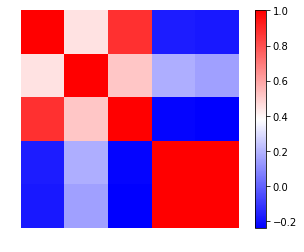

In [279]:
expression =  np.array([[1, 5, 25, 4, 7, 9, 4, 5, 4, 7],
                      [8, 2, 23, 15, 1, 3, 2, 4, 23, 7],
                      [1, 4, 20, 12, 7, 9, 4, 5, 4, 7],
                      [1, 4, 4, 5, 49, 9, 22, 5, 61, 7],
                      [1, 4, 4, 5, 49, 9, 27, 5, 59, 7]])
np.corrcoef(expression)
plt.figure(); plt.imshow(np.corrcoef(expression), cmap='bwr');plt.colorbar();plt.axis('off')

可以看到，默认是把每一行当作是一个**变量**, 把该行上每一列的值当作**观测值**，而计算得到的的`cov`矩阵。如果想得到各个基因间的相关性，最简单的方法就是**转置**一下(其实有参数可以指定把行还是列当作变量)。

`np.linalg.eig()` 这个函数对输入的**矩阵(方阵)**进行**特征值分解**，返回一个包含**特征值向量**和**特征向量矩阵**的元组。

> 注: 特征向量矩阵**每列**为一个特征向量进行表示

<center>
<img src="../docs/img/17EngMath_Matrix_EigenDecomposition_02.png" width=600 height=400></img>
</center>

In [274]:
a = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
"A matrix:"
a
eigs, eigvs = np.linalg.eig(a)
eigs, eigvs = np.real(eigs), np.real(eigvs)
'eigen values:'
eigs
'eigen vectors:'
eigvs
"Q * tri_eigs * Q-1:"
(eigvs @ np.diagflat(eigs)) @ np.linalg.inv(eigvs)# 使用inv求矩阵的逆, 如果矩阵是实对称阵，可直接使用转置:eigvs.T

'A matrix:'

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

'eigen values:'

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

'eigen vectors:'

array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]])

'Q * tri_eigs * Q-1:'

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

`np.linalg.svd()` 这个函数则是对矩阵(对形状无要求)进行**奇异值分解**。由下图可知函数返回一个包含三个`ndarray`的元组。

<center>
<img src="../docs/img/18EngMath_Matrix_SVD_01_2.png" width=600 height=400></img>
</center>

In [273]:
a = np.array([[1, 2, 3],
             [4, 5, 6]])
"M:"
a
U, s, Vh = np.linalg.svd(a)
"U:"
U
"disgonal of S:"
s
'Vh:'
Vh
S = np.diagflat(np.concatenate((s, [0])))[:2]
S
" U * S * Vh:"
(U @ S) @ Vh


'M:'

array([[1, 2, 3],
       [4, 5, 6]])

'U:'

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

'disgonal of S:'

array([9.508032  , 0.77286964])

'Vh:'

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

' U * S * Vh:'

array([[1., 2., 3.],
       [4., 5., 6.]])

`numpy`的`linalg`模块还有更多关于线性代数的函数，这里仅仅展示了一小部分，详见[numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html?highlight=linalg#module-numpy.linalg)。

## 5 高级索引（使用整数数组和布尔数组进行索引）

Numpy还提供比常规python序列更强大的索引功能，即通过**整数数组**和**布尔数组**进行索引，这种索引方式可以极大的提高我们操控数组的灵活性。

### 5.1 整数数组索引

**整数数组索引**的方式与一般的索引所表达的意思一样，就是在**各个轴上**进行索引，并且不同轴的索引使用逗号`,`进行分隔。与一般索引不同的是，`x[obj1, obj2...,objN]`中的`obj`是**整数**`ndarray`。下面举两个例子：

通过使用一个**二维(palette行索引)数组**对`palette`的**第一个轴**进行索引，可以获得一个彩色图片**(高, 宽，三种色彩)**-即**三维数组**。

('palette:', (5, 3))

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

('image:', (2, 4))

array([[0, 1, 3, 4],
       [4, 3, 2, 0]])

('Index pallete with image', (2, 4, 3))

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0,   0, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        [  0,   0,   0]]])

<Figure size 360x144 with 0 Axes>

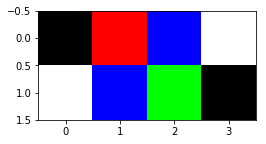

In [414]:
palette = np.array( [ [0,0,0],                # black
                       [255,0,0],              # red
                       [0,255,0],              # green
                       [0,0,255],              # blue
                       [255,255,255] ] )       # white
image = np.array( [ [ 0, 1, 3, 4 ],           # each value corresponds to a color in the palette
                    [ 4, 3, 2, 0 ]  ] )
"palette:", palette.shape
palette
'image:', image.shape
image
"Index pallete with image", palette[image].shape
palette[image]                               # the (2,4,3) color image
plt.figure(figsize=(5,2));plt.imshow(palette[image])

因为只对**第一个轴**进行索引(只有一个`ndarray`), 所以**索引数组**中的每个元素值为**行索引**，通过每个**元素值**(行索引)取得相对应的**行**，每一行的`shape`为(3), 所以最后索引得到的结果的形状为`(2, 4, 3)`(索引数组形状为`(2, 4)`)。

有的时候，通过某些筛选条件，已经知道了符合条件的元素的**行索引和列索引**, 这种情况下就可以利用**整数数组索引**同时对目标数组的**两个轴**进行索引：

In [368]:
a = np.arange(25).reshape(5, 5)
a
target_x = np.array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
target_y = np.array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])
a[target_x, target_y]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

array([ 0,  6, 12, 18, 24,  4,  8, 12, 16, 20])

可以看到，我们为了取出**两个对角线**上的元素，将每个元素的**行和列索引**分别放在两个**索引数组**中，索引得到的是一个**一维数组**。
- 通过第一个数组中的**行索引**，取得的是`a`数组中的某一行(`shape`为`(5,)`)
- 再通过第二个数组中的**列索引**取得**该行**中的某一个值(一个值是0维)，所以最后取得的数组**形状没有发生改变**。

我们前面介绍过的`np.where()`函数正好可以返回一个包含**行索引和列索引数组**的元组: `(x_indices, y_indices)`：

In [4]:
a = np.arange(25).reshape(5, 5)
a
x, y = np.where(a > 12)
x, y
a[x, y]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

(array([2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], dtype=int64),
 array([3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

如果对**多个轴**进行**整数数组索引**，各个索引数组的`shape`必须一致(思考下这是为什么？)。

> 注：实际上很多情况下都不必遵守这个规则，因为有`广播`这一特性，`numpy`会自动的为我们调整数组的形状以满足这个规则。

来看一个例子：

In [295]:
a = np.array([[1, 2, 3, 4],
             [3, 4, 5, 6],
             [6, 7, 8, 9],
             [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 3,  4,  5,  6],
       [ 6,  7,  8,  9],
       [ 9, 10, 11, 12]])

我们如果想取出由**第2、4行**，第**1、3列**元素组成的数组, 可以使用**整数数组**索引的方式获取:

In [299]:
x_ind =[[1, 1],
        [3, 3]]
y_ind = [[0, 2],
         [0, 2]]
a[x_ind, y_ind]

array([[ 3,  5],
       [ 9, 11]])

可以简化为：

In [301]:
x_ind = [[1],
         [3]]
y_ind = [0, 2]
a[x_ind, y_ind]

array([[ 3,  5],
       [ 9, 11]])

看到了吗，因为它们的`shape`不一致，`numpy`自动的为我们给补全了。

### 5.2 布尔数组(mask)索引

通过这个名字很容易猜出，这种索引方式不是通过**索引值(行/列的下标)**进行索引数组，而是通过**布尔值**，决定**保留**哪些值(舍弃哪些值)。当用于索引的对象`obj`为**布尔数组**(`ndarray`)则会触发布尔数组索引。

> 布尔值： `True/False`   布尔数组: `ndarray` 的`dtype`为 `np.bool`

由于**布尔数组**中每个元素的**布尔值**决定了是否**保留**被索引数组中**相对应位置**的元素。可以很自然的想到使用一个和被索引数组**形状相同**的数组进行**索引**。这种情况下以**一维数组**的形式返回所有**保留下来**(`True`)的元素。

下面的例子中我想要提取出数组中不等于`1`的元素, 为了得到我所需要的**布尔数组** 可以使用之前介绍的`比较操作符`来生成我们需要的**布尔数组**：

In [366]:
a = np.array([[1, 2,  1, 1],
              [1, 7,  1, 1],
              [1, 11, 1, 13],
              [1, 1,  16, 1]])
mask = a != 1
a
mask
a[mask]

array([[ 1,  2,  1,  1],
       [ 1,  7,  1,  1],
       [ 1, 11,  1, 13],
       [ 1,  1, 16,  1]])

array([[False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False,  True],
       [False, False,  True, False]])

array([ 2,  7, 11, 13, 16])

可以看到成功的取得了我们需要的元素的值。

实际上，在一个轴上使用**布尔数组索引**`mask_array`，等价于在**该轴上**使用`np.nonzero(mask_array)`即**整数数组索引**。
- 必须要充分认识到这一点，不然有的时候可能会出错。
- 尤其是当同时使用**多个布尔数组**的时候，如果没理解这点，就会出现意想不到的结果。

举个例子： 下面我们要把`A`这个数组中的**第2、4行**，和**第1、3列**组成的子数组取出来(前面我们成功的使用**整数数组索引**做到了)。

In [356]:
A = np.array([[1, 2, 3, 4],
             [3, 4, 5, 6],
             [6, 7, 8, 9],
             [9, 10, 11, 12],
             [3, 2, 1, 3]])
A
mask_array1 = np.array([False, True, False, True, False])
mask_array2 = np.array([True, False, True, False])
mask_array1
mask_array2

array([[ 1,  2,  3,  4],
       [ 3,  4,  5,  6],
       [ 6,  7,  8,  9],
       [ 9, 10, 11, 12],
       [ 3,  2,  1,  3]])

array([False,  True, False,  True, False])

array([ True, False,  True, False])

在一个轴上使用：

`mask_array1`的大小一定要与`A`的**第一个轴**的长度相等，这很好理解

In [357]:
try:
    A[mask_array2]
except Exception as e:
    print(e)
A[mask_array1]                          

boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4


array([[ 3,  4,  5,  6],
       [ 9, 10, 11, 12]])

很好，在意料之中, 让我们把**第二个轴的索引**也加上去：

In [355]:
A[mask_array1, mask_array2]

array([ 3, 11])

欸，好像哪里不对劲，**两个轴**的索引上各有**两个**`True`值啊, 不应该返回一个二维数组吗?

是的，这就是容易出错的地方，违背我们直觉的地方，不过只要按照**下面的说法**来理解就不会出错了。
- 在一个轴上使用**布尔数组索引**`mask_array`，等价于在**该轴上**使用`np.nonzero(mask_array)`进行索引，即 使用**整数数组索引**
- 对于**一维数组** 使用`np.nonzero()` 还是会返回一个元素，第二个元素为空, 我们只需要第一个有用的元素。

我们来验证下:

还是先来试下只使用第一个`mask_array1`的情况(如果不能适应最简单的情况，那这说法肯定就是错的了):

In [369]:
np.nonzero(mask_array1)[0]
A[np.nonzero(mask_array1)[0]]
A[mask_array1]

array([1, 3], dtype=int64)

array([[ 3,  4,  5,  6],
       [ 9, 10, 11, 12]])

array([[ 3,  4,  5,  6],
       [ 9, 10, 11, 12]])

还不错，确实是这么回事，再来试试之前结果出乎意料的**索引方式**(同时使用两个**布尔数组**)：

In [368]:
np.nonzero(mask_array1)[0]
np.nonzero(mask_array2)[0]
A[np.nonzero(mask_array1)[0], np.nonzero(mask_array2)[0]]
A[mask_array1, mask_array2]

array([1, 3], dtype=int64)

array([0, 2], dtype=int64)

array([ 3, 11])

array([ 3, 11])

看，是不是一样的。只要使用上面的说法理解，就可以解释的通了。

再来看我们最开始使用的索引方式(**二维布尔数组**)：

In [374]:
mask = A != 1
mask
x, y = np.nonzero(mask)
x, y
A[np.nonzero(mask)]
A[mask]

array([[False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True]])

(array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4], dtype=int64),
 array([1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 3], dtype=int64))

array([ 2,  3,  4,  3,  4,  5,  6,  6,  7,  8,  9,  9, 10, 11, 12,  3,  2,
        3])

array([ 2,  3,  4,  3,  4,  5,  6,  6,  7,  8,  9,  9, 10, 11, 12,  3,  2,
        3])

bingo! 还是说的通，并且这也解答了为什么当使用一个与**被索引数组**形状相同的**布尔数组**进行索引时，返回的是一个**一维数组**的问题。

### 5.3 总结
总之，将**高级索引**与`numpy`的`any(), nonzero() > < != & | |= &=`以及`where()`等一系列**函数/操作符**(生成`indices/mask`)相结合，可以很轻松、灵活的取得我们想要的元素。

## 6 `view`和`copy`

## 7 Matrics和Sparse Matrix(稀疏矩阵)

## 8 ndarray在内存中的储存方式

首先再次强调`ndarray`的几个重要`Attributes`，通过后面的讲解你会对这些属性有更新的认识：

In [19]:
array = np.array([[1, 2, 3, 4], [4, 5, 6, 7]], dtype=np.float32)
array.shape     # 对于n维数组，返回长度为n的元组，表示数组的大小，即数组在各个维度的长度
array.dtype     # 数组每个元素的类型，float32表明每个元素占用4字节-32bit
array.strides   # 见后

(2, 4)

dtype('float32')

(16, 4)

### 8.1 元素在内存中的布局

在了解了ndarray的抽象数据表示(声音序列、图像、矩阵)和一般性操作后，我们来看看ndarray在计算机内存中是怎么表示的呢(当然不可能和抽象表示一样，三维以下还有可能，更高维相像都想不出)。

计算机内存本质上是线性的(一维), 其基本结构是线性排列的一批储存单元，一般一个单元为1byte(8bit)，每个单元有其唯一的编号-单元地址，程序通过地址进行访问，存取数据；对于一维数组很好办，按照元素的顺序一个一个排列就行了，对于N维数组呢？

#### Row Major

<center>
<img src="../docs/img/19row-major-2D.png" width=500 height=300></img>
</center>

#### Column Major

<center>
<img src="../docs/img/20column-major-2D.png" width=500 height=300></img>
</center>

没错，还可以这么线性存储。只要按照一定的规则来存储，就可以通过计算元素所在的地址来访问对应的元素，从而将**多维数组**的每个元素映射到内存中的某个位置。我们以上图的`Row Major`存储方式来举例(对于`numpy.ndarray` 而言, 默认为按行存储)：

> 注：`ndarray`与`python`内置的数据类型如`list`的最主要的区别就在于元素的存储方式上，`list`是动态数组，其元素(对象)分散在内存中的各个地方，`list`对象通过一个引用数组(类似于地址)记录各个元素所在的位置。在进行大量数据计算的时候，`numpy.ndarray`这种顺序存储的方式能够使得现代CPU对计算进行更多的优化， 这也是numpy速度快的一个原因。详情见下方链接。

可知，第`i行`第`j`列的元素在内存中的地址相对于`首元素地址`的偏移为：$$offset = row \times ncols + col$$

因此知道了首元素的地址和需要访问的元素所在的行和列，就可以通过计算偏移的方式寻找到相应元素的地址了。

我们来看看`ndarray`中的元素的默认存储顺序:

In [107]:
array = np.array([[1, 2, 3, 4],
                  [4, 5, 6, 7]], dtype=np.int8) # 这里注意选择dtype为int8（每个元素占用一个字节)
raw_bytes = array.tobytes('A')                  # 'A' 表明按照元素储存的顺序输出bytes序列，否都会以Row major的顺序输出元素
" ".join(str(x) for x in raw_bytes)
raw_bytes[1 * 4 + 2]                            # 可以看到这两种方式取出来的值都相同
array[1, 2]

'1 2 3 4 4 5 6 7'

6

6

还有Column Major的存储顺序：

In [106]:
array = np.array([[1, 2, 3, 4],
                  [4, 5, 6, 7]],
                 dtype=np.int8, order='F')  # 使用order参数来指定元素在内存种的布局方式，F表示Fortan风格(Column Major)
raw_bytes = array.tobytes('A')              
" ".join(str(x) for x in raw_bytes)
raw_bytes[2 * 2 + 1]                        # 可以看到这两种方式取出来的值都相同
array[1, 2]

'1 4 2 5 3 6 4 7'

6

6

### 8.2 shape、dtype和strides

- 现在`shape`的作用就显而易见了(用于寻地址)。
- `dtype`也决定着如何寻址。上面的计算地址的公式默认了一个假设，那就是每个元素只占用一个字节, 而1字节最大只能用于表示`256(2**8)`, 所以存储一个正整数一般需要使用4个字节，对于浮点数则需要更多。现在寻址的偏移公式为:$$offset = \left( row \times ncols \times  + col \right) \times nbytes$$

#### strides 中文意思就是**步伐**

In [208]:
array = np.array([[1, 2, 3, 4], [4, 5, 6, 7]], dtype=np.float32)
array.strides
4 * 4, 1 * 4

(16, 4)

(16, 4)

- 如果要**跨行**遍历元素，比如先访问`array[0, 0]`后访问`array[1, 0]`那么需要移动几个字节呢，答案是 4 * 4 = **16字节**。
- 如果要**跨列**遍历元素，比如先访问`array[0,1]` 后访问`array[0,2]`呢，那么需要移动**4字节**（因为在Row Major中同一行的元素是仅靠着的）。
- 所以`strides`记录的是在不同维度移动一个单位时所需要的移动的偏移量(步伐)。

### 8.3 尽可能的使用vectorizing操作

举出几个不应该用`ndarray`的例子

In [289]:
# python 中的基本类型都是对象，所以，你可以很轻松的生成一个值很大的int值: 10000000000000000000000000000000
my_int = 1000000000000000000000000000000000000000000000000000000000000000
my_int
a = np.zeros((10000,))
b = [0]*10000
%timeit -n 50 c = [ i for i in a]
%timeit -n 50 d = [i for i in b ]
# python中的数值都是对象，而numpy中的数值想要提取出来，需要读取每个元素的值(读取字节)并经过一系列操作转换为int(python对象)。
# 所以尽可能的利用numpy所提供的vectorizing方法，让numpy进行计算。

1000000000000000000000000000000000000000000000000000000000000000

562 µs ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
197 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


> 详见:<br>
> https://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/<br>
> https://www.jessicayung.com/numpy-arrays-memory-and-strides/<br>
> https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html<br>
> http://www.laurentluce.com/posts/python-list-implementation/

# 二、Pandas 处理表格数据

# 三、统计学习

## 1. Scipy科学计算

## 2. Statmodel

## 3. Scikit-Learn

### 3.1 scikit-learn 是什么

直接来看`sklearn`的官网截图，简洁明了的展示了`sklearn`是用来做什么的：
<center>
<img src="../docs/img/21sklearn_screenshot.png" width=700 height=500></img>
</center>

可以看到`sklearn`为机器学习提供了以下`6`大模块：
- 分类
- 回归
- 聚类
- 维度约减
- 模型选择
- 数据预处理

也可以三大块:

- 数据预处理，比如:
    - 数据标准化(Standardization)/归一化(Normalization)
    - 数据离散化
    - 数据向量化(将标签型数据转换为数字向量)
    - `Imputation`(对缺失值进行填充)
    - 核化(将数据投射到高维空间)
    - 特征的选择
    
- 模型
    - 各种机器学习常见模型
        - 监督学习：
            - 分类： Naive Bayes, 支持向量机, 决策树，集成方法, 神经网络, Gaussian Process
            - 回归：最小二乘回归，Lasso/Ridge回归, 逻辑回归, SVR, 神经网络, Gaussian Process
        - 无监督学习：
            - 聚类：k-means聚类，DBSCAN，混合高斯聚类, 谱聚类 等
            - 维度约减: Pca, LDA, t-SNE
    - 模型参数寻优
- 模型评估
    - 使用各种`score`对模型进行评估：比如:
        - 分类：`accuracy` `recall` `f1` `roc_auc`等
        - 回归：`squared_error`  `r2`等
        - 聚类：`fm_score` `rand_score`等
    - 交叉验证

### 3.2 简单介绍

`sklearn`的接口非常人性化，很容易就可以弄清楚各个函数的作用，并且其模型的**训练/预测数据**一般为`(n_sample, n_feature)`形状的**二维数**组, 模型得到的**标签/回归数值**则是`(n_sample,)`形状的**一维数组**：

大部分情况下，**训练模型**的函数长这样: 

只需要提供一个表示样本特征的`ndarray(n_samples, n_features)`，以及表示各样本标签的`ndarray(n_samples, )`

In [310]:
from sklearn.linear_model import Ridge
print(Ridge.fit.__doc__)

Fit Ridge regression model

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training data

        y : array-like, shape = [n_samples] or [n_samples, n_targets]
            Target values

        sample_weight : float or numpy array of shape [n_samples]
            Individual weights for each sample

        Returns
        -------
        self : returns an instance of self.
        


大部分情况下，使用训练好的模型**预测新数据**的函数长这样:   

由于是预测，自然是返回一个预测好的标签数组啦。

In [311]:
from sklearn.svm import SVC
print(SVC.predict.__doc__)

Perform classification on samples in X.

        For an one-class model, +1 or -1 is returned.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            For kernel="precomputed", the expected shape of X is
            [n_samples_test, n_samples_train]

        Returns
        -------
        y_pred : array, shape (n_samples,)
            Class labels for samples in X.
        


大部分模型都是这么使用的，很多非`sklearn`内置的模型，也实现了这样的接口，比如`xgboost`, 可以与sklearn的交叉验证，模型评估等想结合，甚至你自己的模型都可以整合进来。

### 3.3 示例

以官网提供的一个**手写数字识别**案例为例:

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.96      1.00      0.98        44
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        44
           4       1.00      1.00      1.00        39
           5       0.98      1.00      0.99        50
           6       1.00      1.00      1.00        44
           7       1.00      0.97      0.99        39
           8       1.00      0.94      0.97        49
           9       0.96      0.98      0.97        52

   micro avg       0.99      0.99      0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99 

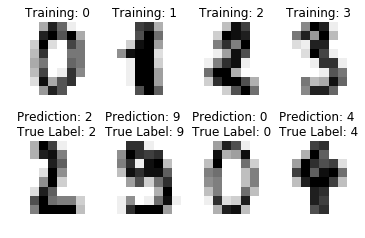

In [336]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
from IPython.utils import io
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# 数据导入， 绘图展示
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
with io.capture_output() as captured:
    for index, (image, label) in enumerate(images_and_labels[:4]):
        plt.subplot(2, 4, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %i' % label)
##############################################################################################
# 以上均不重要

# 数据预处理，划分训练集，测试集
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
train_x, test_x, train_y, test_y = train_test_split(data, digits.target)

# 使用SVC模型, 设置参数, 使用训练集训练模型
classifier = svm.SVC(gamma=0.001)
classifier.fit(train_x, train_y)

# 使用模型预测新数据
predicted_y = classifier.predict(test_x)

# 模型评估
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_y, predicted_y)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, predicted_y))

# 以下均不重要
###########################################################################################

images_and_predictions = list(zip(test_x, predicted_y, test_y))
with io.capture_output() as captured:
    for index, (image, prediction, true_label) in enumerate(images_and_predictions[:4]):
        plt.subplot(2, 4, index + 5)
        plt.axis('off')
        plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Prediction: {} \nTrue Label: {}'.format(prediction, true_label))

plt.show()


看！大约`10`行(主体部分)的代码就能使用一个模型解决我们的问题, 并且准确率那么高(有些字我自己都认不清╯▽╰ )。

# 四、绘图

## Matplotlib

## Seaborn

## Bokeh